In [1]:
## Custom Datasets using Pytorch
## Using your own datasets and building a pytorch model to predict it

##We are going to be building food classification model but in a very small scale

## Using custom data with pytirch
## transforming the data to use with th model
## loading the custom data with pre built function
## build foodvision to classify food images


In [2]:
## importing pytorch and setting up device agnostic code
import torch
from torch import nn

## check version
torch.__version__

'2.2.1+cu121'

In [3]:
## setting up device agnostic code
device ="cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [4]:
!nvidia-smi

Wed May  8 22:42:28 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8               9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [5]:
from genericpath import exists
## Getting some food images/data
## We can see that pytorch has custom food101 dataset
## https://pytorch.org/vision/main/generated/torchvision.datasets.Food101.html

## However for now our dataset is going to be a subset of the Food101 dataset

##Our dataset will have 3 classes of food and only 10% of the images approx 75%
## We are starting on a small scale

import requests
import zipfile
from pathlib import Path

## Setup a path into a data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

if image_path.is_dir():
  print("Image path exists")
else:
  print("creating the image path right now")
  image_path.mkdir(parents=True, exist_ok=True)

creating the image path right now


In [6]:
with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
  request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  print("Downloading the pizza, steak sushi data from github")
  f.write(request.content)

  ## unzip the file
  with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
    print("Unzipping the pizza, steak and the sushi data")
    zip_ref.extractall(image_path)


Unzipping the pizza, steak and the sushi data


In [7]:
## Now we have a custom dataset ready

## Knowing more about the data and working along with it

import os
def walk_through_dir(dir_path):
  ## we will working with the data
  for dirpath, dirname, filenames in os.walk(dir_path):

    print(f"There are {len(dirname)} directories and {len(filenames)} images in {dirpath} ")

In [8]:
walk_through_dir(image_path)

There are 2 directories and 0 images in data/pizza_steak_sushi 
There are 3 directories and 0 images in data/pizza_steak_sushi/test 
There are 0 directories and 31 images in data/pizza_steak_sushi/test/sushi 
There are 0 directories and 25 images in data/pizza_steak_sushi/test/pizza 
There are 0 directories and 19 images in data/pizza_steak_sushi/test/steak 
There are 3 directories and 0 images in data/pizza_steak_sushi/train 
There are 0 directories and 72 images in data/pizza_steak_sushi/train/sushi 
There are 0 directories and 78 images in data/pizza_steak_sushi/train/pizza 
There are 0 directories and 75 images in data/pizza_steak_sushi/train/steak 


In [9]:
## Setting up training and the testing paths
train_dir = image_path / "train"
test_dir = image_path / "test"


In [10]:
## visualize an image

## writing some code to get all of the image paths
## pick a random image path using random.choice
## getting the image class name using pathlib.Path.parent.stem (the last little bit )
## opening the image with the python lib called Pillow PIL python image library
## Getting some meta data about the image and printing some metadata


data/pizza_steak_sushi/train/sushi/1280119.jpg
sushi
Random image path: data/pizza_steak_sushi
Image class: sushi
Image height: 512 and width: 512


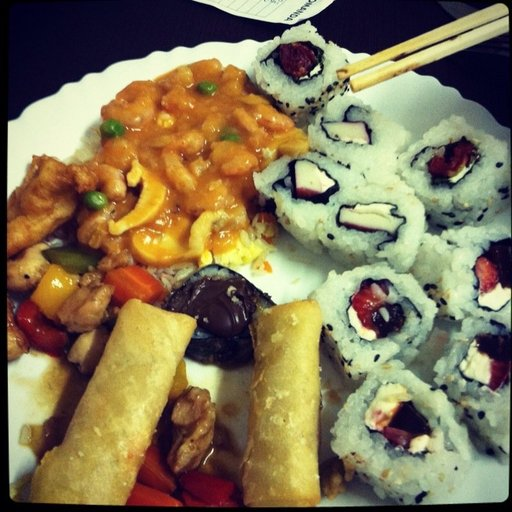

In [11]:
import random
from PIL import Image


## getting all the image path
## glob means sticking all the files with the similar pattern name together
image_path_list = list(image_path.glob("*/*/*.jpg"))

## picking a random image path
random_image_path = random.choice(image_path_list)
print(random_image_path)

## getting the image class from the path name we get it from where the image is stored
image_class = random_image_path.parent.stem
print(image_class)

## open an image
img = Image.open(random_image_path)

## printing some meta data
print(f"Random image path: {image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height} and width: {img.width}")
img

Text(0.5, 1.0, 'Image class : sushi | Image shape: (512, 512, 3) | [height, width, color_channels')

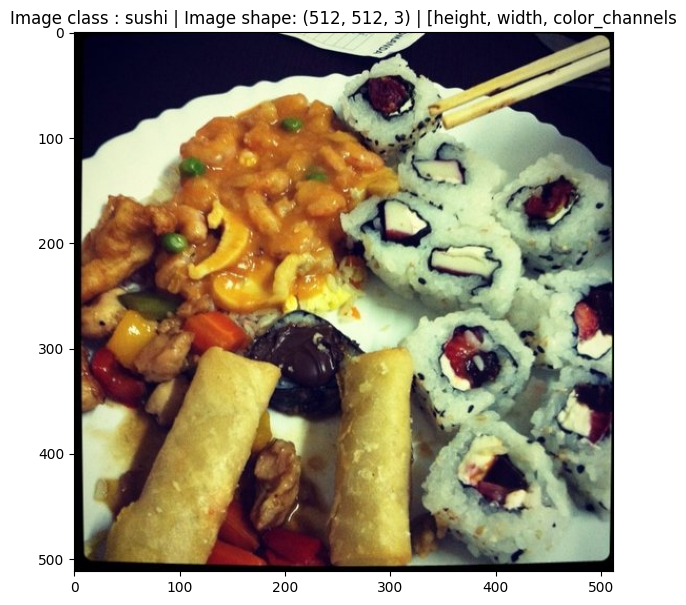

In [12]:
## visualizing an image using matplotlin
import numpy as np
import matplotlib.pyplot as plt

## turn the image into an array
img_as_array = np.asarray(img)

## plot the image with matplotlib
plt.figure(figsize=(10,7))
plt.imshow(img_as_array)
plt.title(f"Image class : {image_class} | Image shape: {img_as_array.shape} | [height, width, color_channels")

array([[[ 1,  0,  8],
        [ 1,  0,  6],
        [ 1,  0,  6],
        ...,
        [ 4,  7,  0],
        [ 6,  8,  3],
        [ 0,  1,  0]],

       [[ 1,  0,  8],
        [ 1,  0,  6],
        [ 1,  0,  5],
        ...,
        [ 0,  1,  0],
        [ 0,  1,  0],
        [11, 13, 10]],

       [[ 1,  0,  6],
        [ 1,  0,  6],
        [ 1,  0,  5],
        ...,
        [ 1,  3,  2],
        [ 0,  1,  4],
        [ 3,  7, 10]],

       ...,

       [[ 0,  0,  4],
        [ 0,  0,  4],
        [ 0,  0,  4],
        ...,
        [ 0,  0,  2],
        [ 0,  0,  2],
        [ 0,  0,  2]],

       [[ 0,  0,  5],
        [ 0,  0,  5],
        [ 0,  0,  4],
        ...,
        [ 0,  1,  0],
        [ 0,  1,  0],
        [ 0,  1,  0]],

       [[ 0,  0,  5],
        [ 0,  0,  5],
        [ 0,  0,  4],
        ...,
        [ 0,  1,  0],
        [ 0,  1,  0],
        [ 0,  1,  0]]], dtype=uint8)
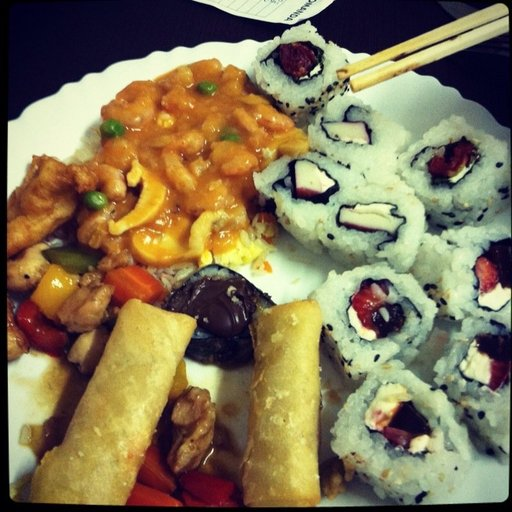

In [13]:
'''
np.asarray(image) converts the image into a NumPy array. Each element of the array represents a pixel in the image. The arrays of numbers signify the intensity values of each pixel in the image.

For a grayscale image, each element in the array is a single value representing the intensity of the pixel, typically ranging from 0 (black) to 255 (white) in an 8-bit image.

For a color image, each element in the array is an array itself, containing three values representing the intensities of the red, green, and blue channels of the pixel, often referred to as RGB values. These values typically range from 0 to 255 for each channel.

In summary, the arrays of numbers in a NumPy array representation of an image signify the pixel intensities or color values of the image, which are used to reconstruct the image when the array is converted back into an image format for display or processing.
'''
img_as_array


In [14]:
## Transforming the data into a pytorch tensor
## Before using the image data with pytorch we have to turn it into tensor - numerical representation of our images
## turn it into torch.utils.data.Dataset and subsequently a torch.utils.data.DataLoader
 ## ^^ we will call this data set and dataloader


In [15]:
## Creating a transforms

import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms



In [16]:
##transforming data with torchvision.transform
data_transform = transforms.Compose([
    ##Resize the images to 64*64
    transforms.Resize(size=(64,64)),
    ##flipping the images for data augmentation on the horizontal
    transforms.RandomHorizontalFlip(p=0.5),
    ## turn the image into a torch tensor
    transforms.ToTensor()
])


In [17]:
data_transform(img)

tensor([[[0.1686, 0.4078, 0.2667,  ..., 0.0078, 0.0039, 0.0039],
         [0.3961, 0.6667, 0.6745,  ..., 0.0078, 0.0078, 0.0000],
         [0.4706, 0.6392, 0.6235,  ..., 0.0078, 0.0078, 0.0039],
         ...,
         [0.4039, 0.6078, 0.6078,  ..., 0.2471, 0.3373, 0.0275],
         [0.1922, 0.4275, 0.4588,  ..., 0.1529, 0.1412, 0.0078],
         [0.0078, 0.0275, 0.0431,  ..., 0.0157, 0.0039, 0.0000]],

        [[0.1686, 0.4039, 0.2588,  ..., 0.0000, 0.0039, 0.0039],
         [0.3922, 0.6588, 0.6706,  ..., 0.0039, 0.0039, 0.0000],
         [0.4667, 0.6392, 0.6235,  ..., 0.0039, 0.0039, 0.0039],
         ...,
         [0.4824, 0.7176, 0.7176,  ..., 0.2039, 0.3255, 0.0314],
         [0.2235, 0.4980, 0.5373,  ..., 0.1176, 0.1294, 0.0118],
         [0.0078, 0.0353, 0.0471,  ..., 0.0078, 0.0039, 0.0000]],

        [[0.1255, 0.3020, 0.2235,  ..., 0.0824, 0.0431, 0.0118],
         [0.2980, 0.4824, 0.4863,  ..., 0.1137, 0.0824, 0.0118],
         [0.3725, 0.4941, 0.4667,  ..., 0.1137, 0.0902, 0.

In [18]:
data_transform(img).dtype

torch.float32

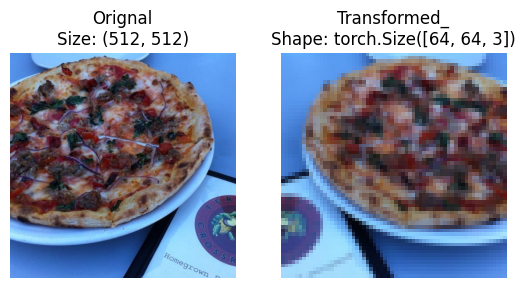

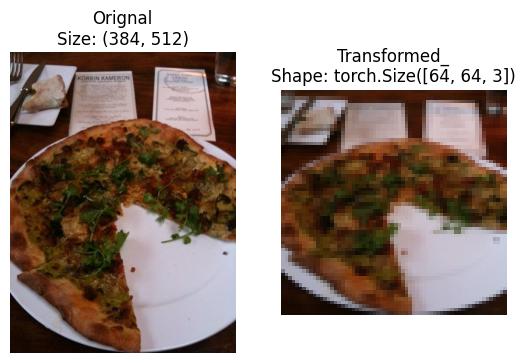

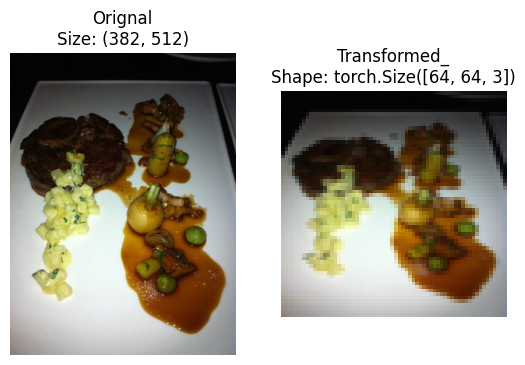

In [19]:
## Transforming the data helps with data augmentation
def plot_transformed_images(image_paths, transform, n=3, seed=42):
  '''
  Selects random images from the image and the loads transfomrs and then plots the original vs the transformed model

  '''
  if seed:
    random.seed(seed)
  random_image_paths = random.sample(image_paths, k=n)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(nrows=1,ncols=2)
      ax[0].imshow(f)
      ax[0].set_title(f"Orignal\nSize: {f.size}")
      ax[0].axis(False)

      ## transform and plot the target image
      transformed_image = transform(f).permute(1,2,0) ## we will need to change the shape for matplot lub and the permute changes the order of the dimension
      ax[1].imshow(transformed_image)
      ax[1].set_title(f"Transformed_\nShape: {transformed_image.shape}")
      ax[1].axis('off')
plot_transformed_images(image_paths=image_path_list, transform=data_transform, n=3,seed=None)

In [20]:
##Loading image data using imagefolder from pytorch

## We can load image classification data using torchvisio.datasets.ImageFolder

##Using image folder to create a dataset
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform, ##transform the data
                                  target_transform=None) # a transform for the label as they are going to infered by the directory names

test_data = datasets.ImageFolder(root=test_dir, transform=data_transform)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [21]:
## Get classnames as a list
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [22]:
## get the class names as a dictionary
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [23]:
## check the lengths of our datasets
len(train_data), len(test_data)

(225, 75)

In [24]:
train_data.samples[0]

('data/pizza_steak_sushi/train/pizza/1008844.jpg', 0)

In [25]:
## getting the index on the train_data Dataset to get a single image and label
img, label = train_data[0][0], train_data[0][1]
print(f"Image tensor: \n {img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")

Image tensor: 
 tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
         [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
         [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
         ...,
         [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
         [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0902],
         [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],

        [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
         [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0745],
         [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
         ...,
         [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
         [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
         [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],

        [[0.0196, 0.0196, 0.0157,  ..., 0.0902, 0.0902, 0.0941],
         [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
         [0.0196, 0.0157, 0.0157,  ..., 0.

Original Shape: torch.Size([3, 64, 64]) -> [color, height, width]
Image permute: tensor([[[0.1176, 0.0588, 0.0196],
         [0.1216, 0.0588, 0.0196],
         [0.1255, 0.0588, 0.0157],
         ...,
         [0.0980, 0.0745, 0.0902],
         [0.1020, 0.0706, 0.0902],
         [0.1137, 0.0745, 0.0941]],

        [[0.1294, 0.0627, 0.0196],
         [0.1294, 0.0627, 0.0157],
         [0.1294, 0.0627, 0.0196],
         ...,
         [0.0980, 0.0745, 0.0902],
         [0.0980, 0.0706, 0.0863],
         [0.1059, 0.0745, 0.0902]],

        [[0.1333, 0.0706, 0.0196],
         [0.1333, 0.0706, 0.0157],
         [0.1333, 0.0706, 0.0157],
         ...,
         [0.0941, 0.0745, 0.0902],
         [0.0980, 0.0745, 0.0902],
         [0.1020, 0.0706, 0.0902]],

        ...,

        [[0.1686, 0.2392, 0.1843],
         [0.1647, 0.2392, 0.1882],
         [0.1686, 0.2510, 0.1961],
         ...,
         [0.1255, 0.1373, 0.1490],
         [0.1098, 0.1333, 0.1333],
         [0.1098, 0.1255, 0.1294]],

 

Text(0.5, 1.0, 'pizza')

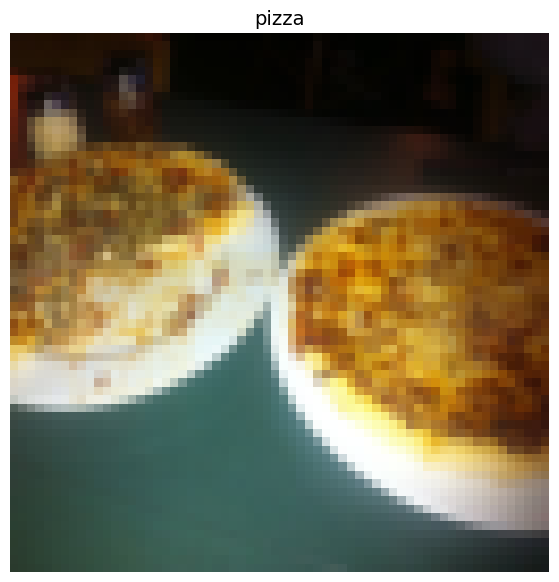

In [26]:
## rearrange the order of the dimensions because matplotlib likes color channels at the end

img_permute = img.permute(1,2,0)

print(f"Original Shape: {img.shape} -> [color, height, width]")
print(f"Image permute: {img_permute} -> [height, width, color]")

## plot
plt.figure(figsize=(10,7))
plt.imshow(img_permute)
plt.axis('off')
plt.title(class_names[label], fontsize=14)

In [27]:
## we have officially made an image from some numbers which is very exciting
## we had a matrix and based on its pixel activations we created a pixalated version of this image with pure matrix

## turning loaded images into dataloader

## a DataLoader is going to help us turn our datasets into iterables so our model can see batch size images at a time
import os
## turning the train and test set into data loaders
from torch.utils.data import DataLoader
train_dataloader = DataLoader(dataset=train_data, batch_size=1, num_workers=os.cpu_count(), shuffle=True)
test_dataloader= DataLoader(dataset=test_data, batch_size=1, num_workers=os.cpu_count(), shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x78bd18a9ec20>,
 <torch.utils.data.dataloader.DataLoader at 0x78bd18c384f0>)

In [28]:
len(train_dataloader), len(test_dataloader)

(225, 75)

In [29]:
len(train_data), len(test_data)

(225, 75)

In [30]:
img, label = next(iter(train_dataloader))

## batch size will now be one, which we can change later
print(f"Image shape: {img.shape} -> batch_size, color channels, height, width")
print(f"Label shape: {label.shape}")

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Image shape: torch.Size([1, 3, 64, 64]) -> batch_size, color channels, height, width
Label shape: torch.Size([1])


In [31]:
## What will we do if the ImageFolder did not exist and we have to write our own function

In [32]:
## Options : Loading the image data with a custom dataset

##Want to be able to load images to a file
## want to be able to get class names from the Dataset
## want to be able to get classes from the dictionary from Dataset

## Why do this? We can create Dataset out of almost everything
## not limited to the pytorch pre built dataset functions


In [33]:
import os
import pathlib
import torch
from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

##instance of torchvision.datasets.ImageFolder()
train_data.classes, train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [34]:
## 5.1 Creating a helper function to get class names

## get the class names os.scandir() to traverse a target directory
## raise an error if the class names are not found, which would mean there is something wrong with the directory structure
## turn the class names into a dict and a list and return them

target_directory = train_dir
print(f"Target dir: {target_directory}")

## get the class names from the target directory
class_names_found = sorted([entry.name for entry in list(os.scandir(target_directory))])
class_names_found

Target dir: data/pizza_steak_sushi/train


['pizza', 'steak', 'sushi']

In [35]:
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
  '''
  Finds the class folder names in a target directory

  '''
  ## we want to get the class names by scanning the target directory
  classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())

  if not classes:
    raise FileNotFoundError(f"Could not find any classes")

  ## create a dictionary of index labels - computers prefer numbers rather than strings as labels
  class_to_idx = {class_name: i for i, class_name in enumerate(classes)}
  return classes, class_to_idx

In [36]:
find_classes(target_directory)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [37]:
## now we will write a custom dataset to replicate the ImageFolder

##To create our custom dataset we want tp
## 1) Subclass torch.utils.Dataset
## 2) Init our subclass with a target directory as well as a transform if we want to transform our data
## 3) create attributes - paths, transorm, classes and class_to_ids: a dict of the target classes mapped to the integer labels
## 4) Create a function to 'load_images()', this function will open an image
## 5) Overwrite the __len__() method to return the length of our dataset
## 6) Overwrite getitem() method to return a given sample when passed an index




In [38]:
from torch.utils.data import Dataset

class ImageFolderCustom(Dataset):
  ## initialize our custom dataset
  def __init__(self, targ_dir: str, transform=None):
    ## create class attributes
    ##get all the image paths
    ## give us list of all the image paths
    self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg"))
    ## setup transforms
    self.transform = transform
    ##create classes and class_to_idx attributes
    self.classes, self.class_to_idx = find_classes(targ_dir)
  ## create a funciton to load images
  def load_image(self, index:int) -> Image.Image:
    '''
    Opens an image via a path and returns it

    '''
    image_path = self.paths[index]
    return Image.open(image_path)

  ## overwriting __len__()

  def __len__(self) -> int:
    '''
    returns the total number of samples
    '''
    return len(self.paths)
  def __getitem__(self, index) -> Tuple[torch.tensor, int]:
    '''
    Returns one sample of data, data and label (x,y)

    '''
    img = self.load_image(index)
    class_name = self.paths[index].parent.name ## this expects the path in format
    class_idx = self.class_to_idx[class_name]

    ## transform if neccessary
    if self.transform:
      return self.transform(img), class_idx
    else:
      img, class_idx ## return untransformed data



In [39]:
## create a transform
train_transforms = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()

])
test_transforms = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()

])


In [40]:
## test our the ImageFolderCustom

train_data_custom = ImageFolderCustom(targ_dir=train_dir, transform=train_transforms)
test_data_custom = ImageFolderCustom(targ_dir=test_dir, transform=test_transforms)

In [41]:
len(train_data)

225

In [42]:
len(train_data_custom)

225

In [43]:
train_data_custom.classes

['pizza', 'steak', 'sushi']

In [44]:
## Check for quality between the original ImageFolder Dataset and ImageFolderCustomDataset
print(train_data_custom.classes==train_data.classes)

True


In [45]:
## Create a function to display random images
#1) Take in a dataset  and a number of other parameters such as class names and how many images to visualize
## 2_ To prevent the display getting out of hand, let's cap the number of images to see 10
## 3) Set the random seed for reproducibility
## 4) Get a list of random sample indexes from the target dataset
## 5) Setup matplotlib plot
## 6) Loop through the random sample images and plot them with matplotlib
## 7) Make sure the dimensions of our images line up with matplotlib


In [46]:
## creating a function that takes a dataset
def display_random_images(dataset: torch.utils.data.Dataset,
                          classes:List[str] = None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):
  ## adjust the display if too high
  if n> 10:
    n=10
    display_shape = False
    print(f"For display purposes, n should not be larger than 10")
  ## set the random seed
  if seed:
    random.seed(seed)
  ##get random sample indexes
  random_samples_idx = random.sample(range(len(dataset)), k=n)
  ##set up a plot
  plt.figure(figsize=(16,8))
  ## loop through random indexes and plot them with matplotlib
  for i, targ_sample in enumerate(random_samples_idx):
    targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

    ##7 adjust the tensor dimensions for plotting
    targ_image_adjust = targ_image.permute(1,2,0) ## color, height, width
    plt.subplot(1,n,i+1)
    plt.imshow(targ_image_adjust)
    plt.axis("off")
    if classes:
      title =f"Class: {classes[targ_label]}"
      if display_shape:
        title = title + f"\nshape: {targ_image_adjust.shape}"
    plt.title(title)


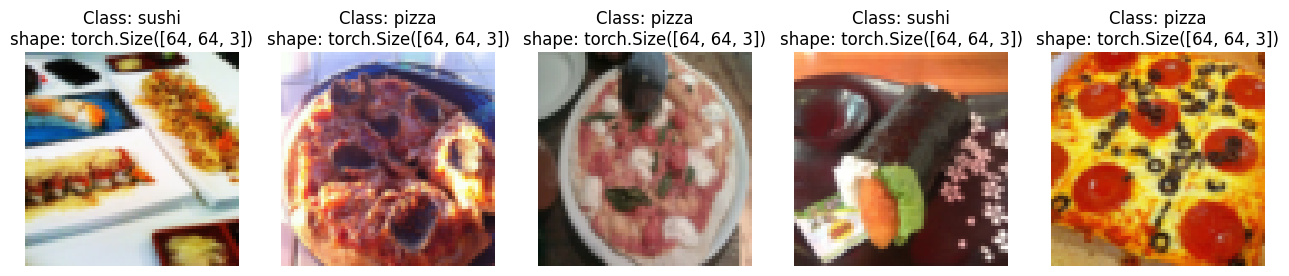

In [47]:
## display random images from the ImageFolder created Dataset
display_random_images(train_data,n=5,classes=class_names, seed=42)

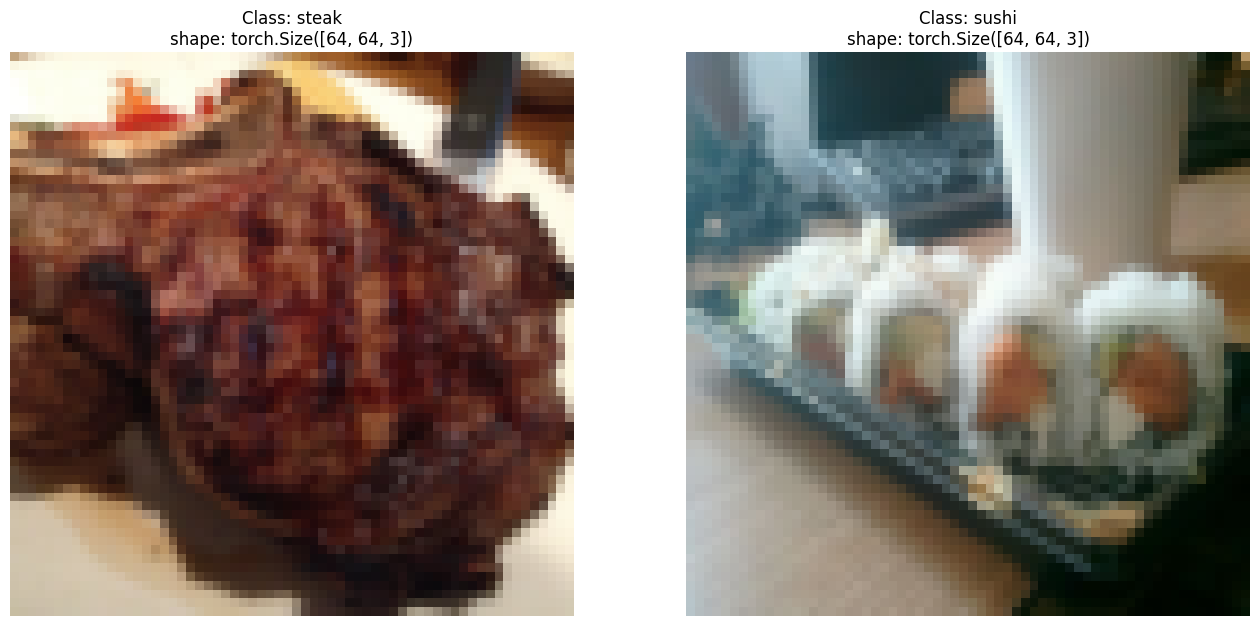

In [48]:
##display random images from the ImageFolderCustom dataset
display_random_images(train_data_custom,n=2,classes=class_names, seed=42)

In [49]:
##turning our custom dataset into a dataloader
## turning custom loaded images into DataLoader's
from torch.utils.data import DataLoader
BATCH_SIZE=32
train_dataloader_custom = DataLoader(dataset=train_data_custom, batch_size=BATCH_SIZE, num_workers=0, shuffle=True)
test_dataloader_custom = DataLoader(dataset=test_data_custom, batch_size=BATCH_SIZE, num_workers=0, shuffle=False)

In [50]:
train_dataloader_custom, test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x78bd1815fee0>,
 <torch.utils.data.dataloader.DataLoader at 0x78bd1815e350>)

In [51]:
## get the image and label from the cusotm dataloader

img_custom, label_custom = next(iter(train_dataloader_custom))

img_custom.shape, label_custom.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [52]:
!nvidia-smi

Wed May  8 22:42:49 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8               9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [53]:
torch.__version__

'2.2.1+cu121'

In [54]:
## 6 other forms of transforms - data augmentation
## artifically adding diversity to be adding into your training data
## in the case of the image data, this means applying various image transformations to the training images


In [55]:
## We can rotate it,shift it, and zoom it in there
## Let us take a look at one particular type of data augmentation used to train Pytorch vision models to state of the art levels

## results into a model which is more generalizable

##let us lool at trivial augment


In [56]:
from torchvision import transforms
train_transforms = transforms.Compose([
    transforms.Resize(size=(224,224)),
    ##num_magnitude gives us the how much is the transform applied
    transforms.TrivialAugmentWide(num_magnitude_bins=31)


])

test_transforms = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.ToTensor()
])

In [57]:
image_path

PosixPath('data/pizza_steak_sushi')

In [58]:
image_path_list = list(image_path.glob("*/*/*.jpg"))


AttributeError: permute

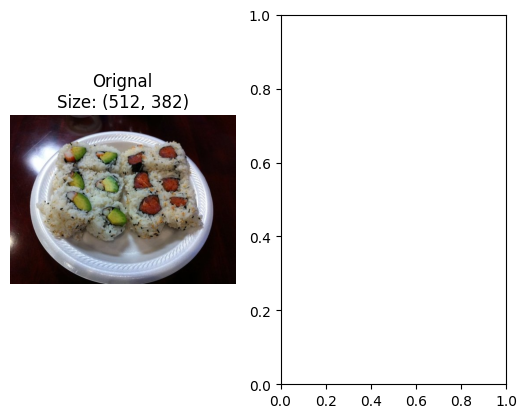

In [59]:
plot_transformed_images(
    image_paths=image_path_list,
    transform=train_transforms,
    n=3,
    seed=None
)

In [60]:
## Model 0: TinyVGG Architecture without data augmentation

##Creating transforms architecture from the CNN Explainer website
##Creating a simple transform

simple_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

In [61]:
## Load and transform the data
from torchvision import datasets
train_data_simple = datasets.ImageFolder(root=train_dir,
                                         transform=simple_transform)
test_data_simple = datasets.ImageFolder(root=test_dir,
                                        transform=simple_transform)

##Setting up the batch size
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

##Creating the DataLoader
train_dataloader_simple = DataLoader(dataset=train_data_simple,
                                     batch_size=BATCH_SIZE,
                                     shuffle=True,
                                     num_workers=NUM_WORKERS)
test_dataloader_simple = DataLoader(dataset=test_data_simple,
                                     batch_size=BATCH_SIZE,
                                     shuffle=False,
                                     num_workers=NUM_WORKERS)



In [62]:
## Building the tinyVGG Architecture

class TinyVGG(nn.Module):
  '''
  Model architecture copying TinyVGG fromt he CNN Explainer website

  '''
  def __init__(self, input_shape:int, hidden_units, output_shape):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        ##we do this to not to get an image error
        nn.Linear(in_features=hidden_units*13*13, out_features=output_shape)
    )
  def forward(self, x):
    x = self.conv_block_1(x)
    print(x.shape)
    x = self.conv_block_2(x)
    print(x.shape)
    x = self.classifier(x)
    print(x.shape)
    return x







In [63]:
torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3, ##number of color channels in our data
                  hidden_units=10,
                  output_shape=len(class_names)).to(device)

model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

In [64]:
##passing some dummy data through the model to check if we have implemented the forward pass properly or not


##try a forward pass on a single image

##getting a single image batch
image_batch, label_batch = next(iter(train_dataloader_simple))
image_batch.shape, label_batch.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [65]:
## trying a forward pass
model_0(image_batch.to(device))## this would throw us an error

torch.Size([32, 10, 30, 30])
torch.Size([32, 10, 13, 13])
torch.Size([32, 3])


tensor([[ 2.0795e-02, -1.9510e-03,  9.5212e-03],
        [ 1.8440e-02,  2.4669e-03,  6.6609e-03],
        [ 1.7695e-02,  1.0282e-03,  9.4975e-03],
        [ 2.4446e-02, -3.3489e-03,  9.5877e-03],
        [ 1.9939e-02,  6.9129e-04,  1.0778e-02],
        [ 2.1281e-02,  2.0434e-03,  5.0046e-03],
        [ 2.0996e-02,  1.6417e-04,  1.2481e-02],
        [ 2.1566e-02, -1.9607e-03,  9.7175e-03],
        [ 2.4500e-02, -4.7904e-03,  8.5394e-03],
        [ 2.0239e-02, -4.7980e-04,  1.0907e-02],
        [ 2.2219e-02, -4.1815e-04,  9.8173e-03],
        [ 2.2318e-02, -2.1642e-03,  9.4428e-03],
        [ 2.1851e-02, -3.7225e-03,  8.3784e-03],
        [ 2.2881e-02, -1.7559e-03,  1.0299e-02],
        [ 2.1635e-02, -4.3994e-03,  9.4990e-03],
        [ 2.2101e-02, -4.1469e-03,  9.3904e-03],
        [ 2.1226e-02, -4.4215e-03,  1.1476e-02],
        [ 2.1698e-02, -2.7458e-03,  8.4966e-03],
        [ 1.9974e-02, -3.2317e-07,  8.4496e-03],
        [ 1.8308e-02,  1.6378e-03,  8.5491e-03],
        [ 2.0768e-02

In [ ]:
## use torchinfo to get an idea of the shapes going through our model
try:
  import torchinfo
except:
    !pip install torchinfo
    import torchinfo

from torchinfo import summary
summary(model_0, input_size=(1,3,64,64))

In [ ]:
##train step to train our model

##creating a train_step function - takes in a model and a adataloader and trains the model on the dataloader
## test_step which takes in a model and a dataloader and evaluates the model on the dataloader

def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):
    # Put model in train mode
    model.train()

    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0

    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metric across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

In [ ]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):
    # Put model in eval mode
    model.eval()

    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0

    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

    # Adjust metrics to get average loss and accuracy per batch
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc



In [ ]:
## Create a train function which combines the train step and the test step

In [ ]:
from tqdm.auto import tqdm

##1) Create a train function which takes in various model parameters + optimizer + dataloader + loss function

def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5,
          ):


  ## create an empty results dictionary
  results ={
      "train_loss": [],
      "train_acc" : [],
      "test_loss" : [],
      "test_acc" : []
  }
  ##3) Loop through the training and the testing steps for number of epochs
  for epoch in tqdm(range(epochs)):
    train_loss, train_acc = train_step(model=model, dataloader=train_dataloader,
                                       loss_fn=loss_fn,
                                       optimizer=optimizer,
                                       )
    test_loss, test_acc = test_step(model=model, dataloader=test_dataloader,
                                    loss_fn=loss_fn)
    ##print out what is happening
    print(f"Epoch: {epoch} | Train Loss: {train_loss: .4f} | Test Loss: {test_loss: .4f} | Test Accuracy: {test_acc: .4f}")
    ## update our results dictionary
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)
  return results

In [ ]:
### Training and evaluating the model 0
##setting the random seeds

torch.manual_seed(42)
torch.cuda.manual_seed(42)

##set the number of epochs
NUM_EPOCHS = 5

##Recreate an instance of TinyVGG
model_0 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)

##set up a loss function and optimizer
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)

##starting the timer
from timeit import default_timer as timer
start_time = timer()

##train the model_0
model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader_simple,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)
##End the timer and print out how long it took
end_time = timer()

print(f"Total training time: {end_time-start_time: .3f} seconds")


In [ ]:
## plot a loss curve for model_0

##this is the track to the progress of a model over time

## get the model_0 results keys
model_0_results.keys()

In [ ]:
def plot_loss_curves(results:Dict[str, List[float]]):
  '''
  Plotting the training curevs of a results dictionary
  '''
  loss = results["train_loss"]
  test_loss = results["test_loss"]
  ##get the accuracy values of the results dictionaru - traning and test
  accuracy = results["train_loss"]
  test_accuracy=results["test_acc"]

  ## figure out how many epochs there were
  epochs=range(len(results["test_loss"]))
  ##setup a plot
  plt.figure(figsize=(15,7))
  ##plot the loss

  plt.subplot(1,2,1)
  plt.plot(epochs, loss, label="train_loss")
  plt.plot(epochs, test_loss, label="test_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  ##plot the accuracy
  plt.subplot(1,2,2)
  plt.plot(epochs, accuracy, label="train_accuracy")
  plt.plot(epochs,test_accuracy, label="test_accuracy")
  plt.title("accuracy")
  plt.xlabel("Epochs")
  plt.legend()


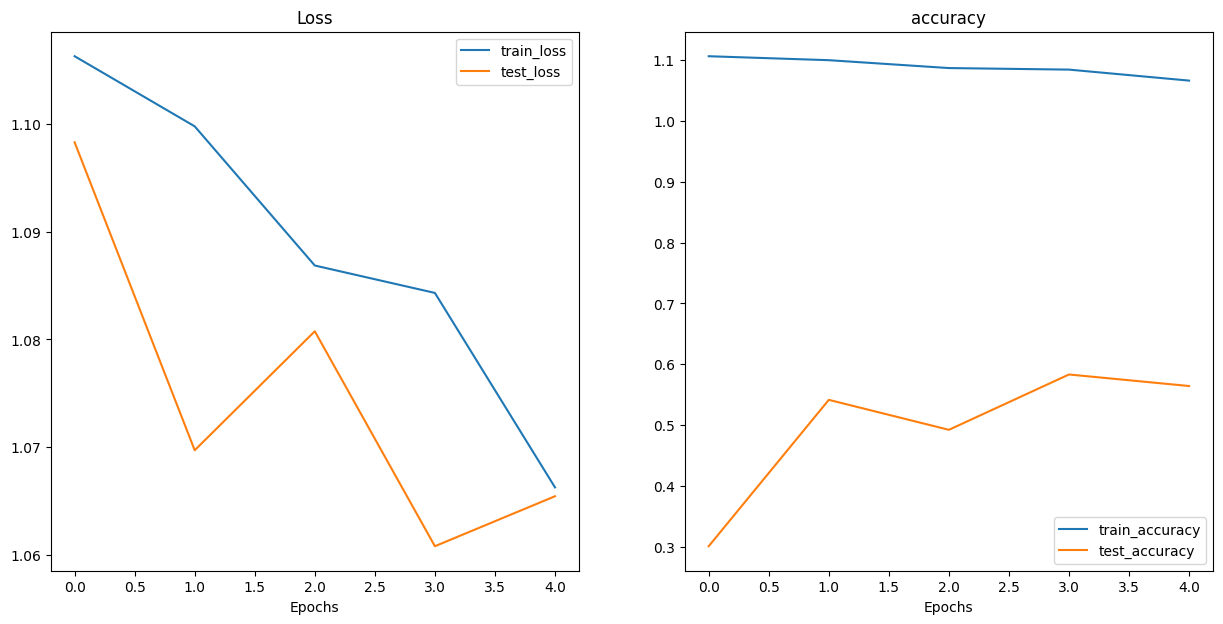

In [76]:
plot_loss_curves(model_0_results)

In [ ]:
## what should an ideal loss curve look like

##Loss curves which are different types are - underfitting, overfitting, just right which is the goldilock zone

##Underfitting when the test loss is greater than the train loss (the model is not learning the training data that well )
##overfitting is when the training loss is lower than your testing loss (the learning is not reflected in the testing dataset)

##how to deal
## overfitting - get more data, data augmentation, better data, use transfer learning, simplofy your model, use learning rate decay, use early stopping
##Sometimes the models might get stuck while working with the training or testing throughout the epochs



In [78]:
##Creating a TinyVGG model with data augmentation - a way of manipulating the images so increasing the diversity to deal with the model learning more generalizable pattern

##Trying another model, but this time using the same model as before with some augmentation

##Create transform with data augmentation  with Trivial Augment
from torchvision import transforms
train_transform_trivial = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])
test_transform_simple = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

## create train and test datasets and dataloader using the augmentation transforms

##Turning the image folders into Datasets
from torchvision import datasets
train_data_augmented = datasets.ImageFolder(root=train_dir, transform=train_transform_trivial)
test_data_simple = datasets.ImageFolder(root=test_dir,transform=test_transform_simple)


In [80]:
## turning our datasets into dataloaders
import os
from torch.utils.data import DataLoader
BATCH_SIZE=32
NUM_WORKERS=os.cpu_count()
torch.manual_seed(42)
train_dataloader_augmented=DataLoader(dataset=train_data_augmented,
                                      batch_size=BATCH_SIZE,
                                      shuffle=True,
                                      num_workers=NUM_WORKERS)
test_dataloader_simple = DataLoader(dataset=test_data_simple,
                                    batch_size=BATCH_SIZE,
                                    shuffle=False,
                                    num_workers=NUM_WORKERS)


In [81]:
## Constructing and training model 1
##This time we will be using the same model architecture except this time we have augmented the training data

##Create model_1 and send it to the target device
torch.manual_seed(42)
model_1 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(train_data_augmented.classes)).to(device)

model_1

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

In [89]:
##Now we have a model and a dataloaders, now we have to create a loss function and an optimizer and call upon our train() to train it on the augmented data and train our model

##set random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

##set the number of epochs
NUM_EPOCHS=5

##Setup a loss function

loss_fn=nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(), lr=0.001)

##starting the timer
from timeit import default_timer as timer
start_time=timer()


##train the model_1
model_1_results=train(model=model_1, train_dataloader=train_dataloader_augmented, test_dataloader=test_dataloader_simple, optimizer=optimizer, loss_fn=loss_fn, epochs=NUM_EPOCHS)

##end the time
end_time = timer()
print(f"Total training time for model_!: {end_time - start_time:.3f} seconds")


  0%|          | 0/5 [00:00<?, ?it/s]

torch.Size([32, 10, 30, 30])
torch.Size([32, 10, 13, 13])
torch.Size([32, 3])
torch.Size([32, 10, 30, 30])
torch.Size([32, 10, 13, 13])
torch.Size([32, 3])
torch.Size([32, 10, 30, 30])
torch.Size([32, 10, 13, 13])
torch.Size([32, 3])
torch.Size([32, 10, 30, 30])
torch.Size([32, 10, 13, 13])
torch.Size([32, 3])
torch.Size([32, 10, 30, 30])
torch.Size([32, 10, 13, 13])
torch.Size([32, 3])
torch.Size([32, 10, 30, 30])
torch.Size([32, 10, 13, 13])
torch.Size([32, 3])
torch.Size([32, 10, 30, 30])
torch.Size([32, 10, 13, 13])
torch.Size([32, 3])
torch.Size([1, 10, 30, 30])
torch.Size([1, 10, 13, 13])
torch.Size([1, 3])
torch.Size([32, 10, 30, 30])
torch.Size([32, 10, 13, 13])
torch.Size([32, 3])
torch.Size([32, 10, 30, 30])
torch.Size([32, 10, 13, 13])
torch.Size([32, 3])
torch.Size([11, 10, 30, 30])
torch.Size([11, 10, 13, 13])
torch.Size([11, 3])
Epoch: 0 | Train Loss:  1.0122 | Test Loss:  1.0370 | Test Accuracy:  0.3741
torch.Size([32, 10, 30, 30])
torch.Size([32, 10, 13, 13])
torch.Size

In [90]:
model_1_results

{'train_loss': [1.0122017934918404,
  1.027752198278904,
  0.9153253138065338,
  1.0111771374940872,
  0.927976056933403],
 'train_acc': [0.53515625, 0.421875, 0.5546875, 0.4609375, 0.57421875],
 'test_loss': [1.0370251933733623,
  1.0722933212916057,
  1.0723268787066143,
  1.0718762874603271,
  1.0897674957911174],
 'test_acc': [0.3740530303030303,
  0.3333333333333333,
  0.3333333333333333,
  0.3020833333333333,
  0.3020833333333333]}

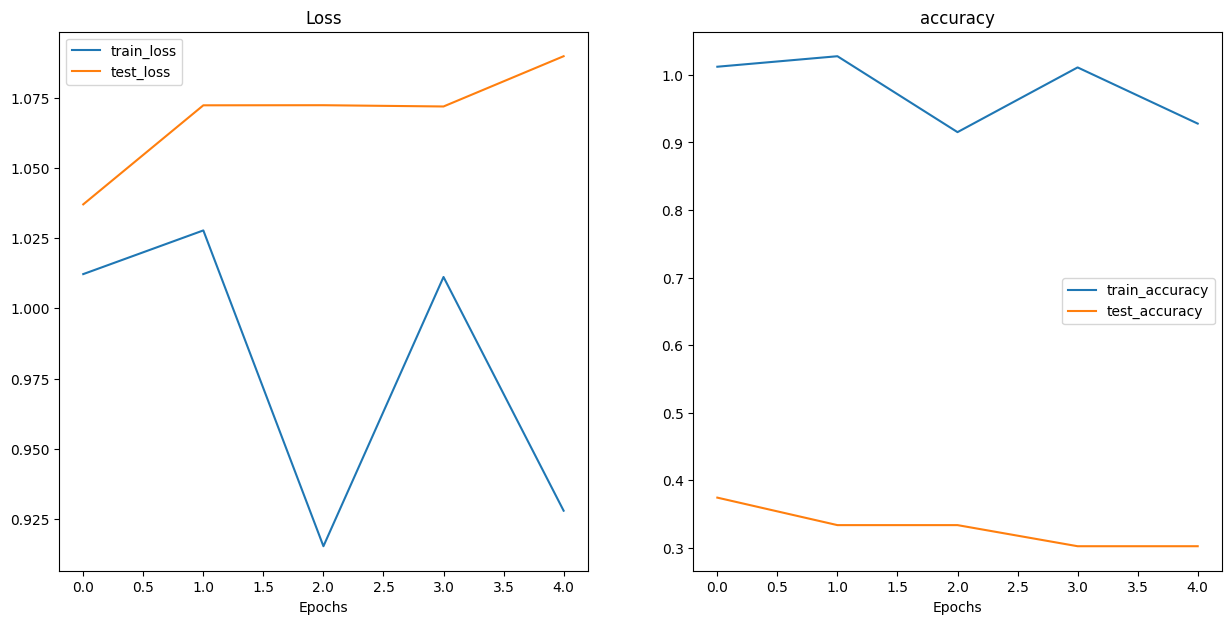

In [91]:
##plotting the loss curves of the models performance overtime
plot_loss_curves(model_1_results)

In [92]:
 ##comparing the two model results by comparing the model results side by side

##After evaluating the modelling the experiments on their own, it is important to compare them to each other
## Hard coding
## pytorch tensorboard
## weights and biases
import pandas as pd
model_0_df = pd.DataFrame(model_0_results)
model_1_df = pd.DataFrame(model_1_results)
model_0_df

,train_loss,train_acc,test_loss,test_acc
0,1.106319,0.304688,1.098321,0.301136
1,1.099802,0.328125,1.069699,0.541667
2,1.086868,0.488281,1.080757,0.492424
3,1.084321,0.402344,1.060780,0.583333
4,1.066249,0.410156,1.065425,0.564394


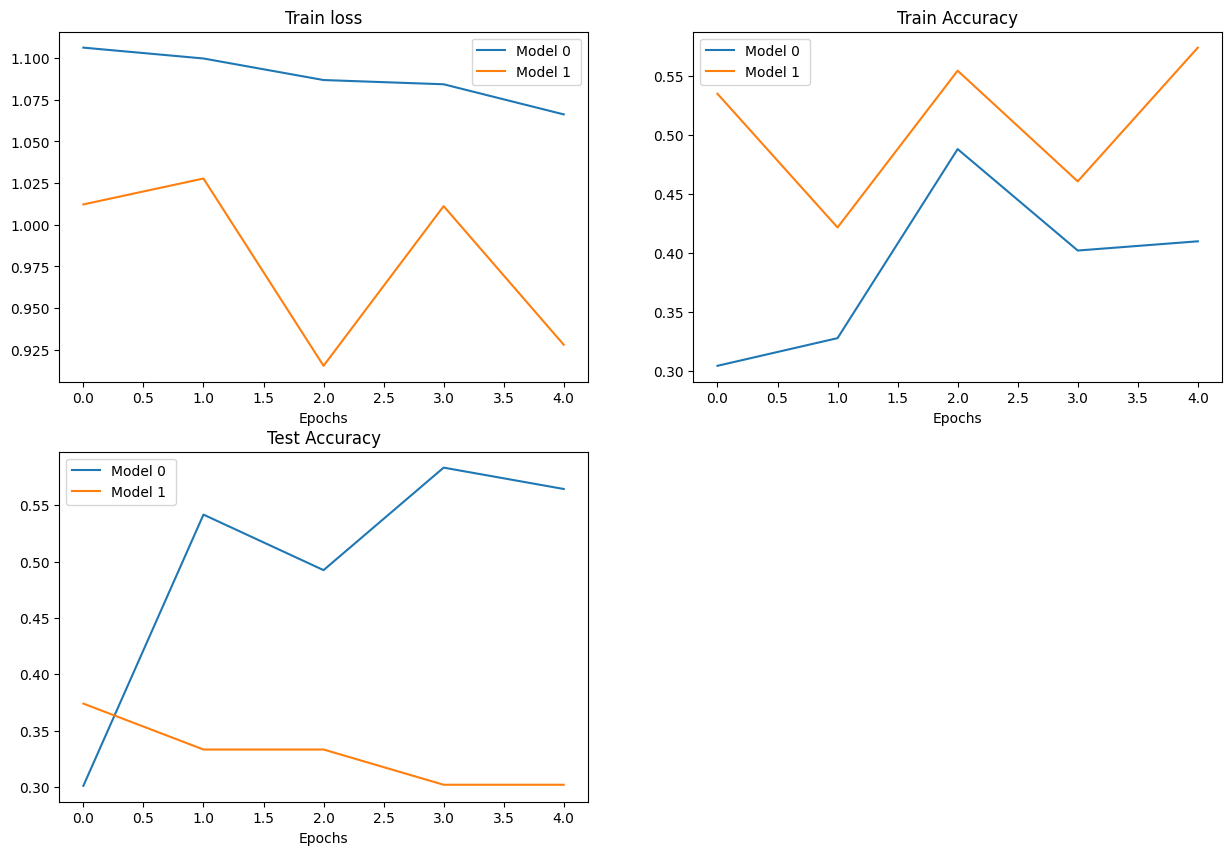

In [98]:
##we want to plot them on the same chart
plt.figure(figsize=(15,10))

##number of epochs
epochs=range(len(model_0_df))

##plot the training loss
plt.subplot(2,2,1)
plt.plot(epochs, model_0_df["train_loss"], label="Model 0 ")
plt.plot(epochs, model_1_df["train_loss"], label="Model 1")
plt.title("Train loss")
plt.xlabel("Epochs")
plt.legend()

##plot the testing acc
plt.subplot(2,2,2)
plt.plot(epochs, model_0_df["train_acc"], label="Model 0 ")
plt.plot(epochs, model_1_df["train_acc"], label="Model 1")
plt.title("Train Accuracy")
plt.xlabel("Epochs")
plt.legend()
##plot the testing loss
plt.subplot(2,2,3)
plt.plot(epochs, model_0_df["test_acc"], label="Model 0 ")
plt.plot(epochs, model_1_df["test_acc"], label="Model 1")
plt.title("Test Accuracy")
plt.xlabel("Epochs")
plt.legend()

In [99]:
 ## Let us make a predicition on an image which is not in the training or in the testing dataset

 ##Getting a custom image
 ##downloading a custom image, we are going to use requests
import requests
custom_image_path = "04-pizza-dad.jpeg"

##converting our custom image into a tensor form
## We have to make sure our custom image is in the same format as the data our model was trained on.

##data type - float32
## of the shape 64x64x3
##on the right device



In [104]:
import torchvision

##we can read an image into Pytorch using custom image
custom_image_uint8 = torchvision.io.read_image(custom_image_path)
custom_image_uint8
print(f"Shape of the custom image: {custom_image_uint8.shape}")
print(f"Data Type of the custom image: {custom_image_uint8.dtype}")

Shape of the custom image: torch.Size([3, 4032, 3024])
Data Type of the custom image: torch.uint8


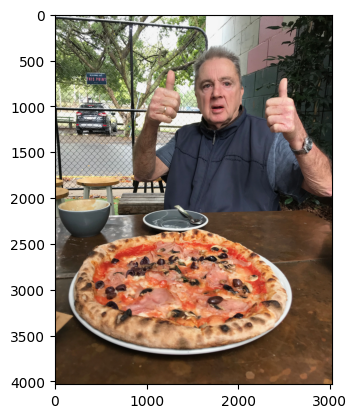

In [102]:
plt.imshow(custom_image_uint8.permute(1,2,0))

In [109]:
##we have to convert our int/tensor to a custom image
## Making a prediction on a custom image with a trained pytorch model
## try to make a predicition on an image on uint8 format

model_1.eval()
##Loading the custom image and converting it into torch.float32
##  We can divide this by 255 in order to scale the values from 0 to 1
custom_image = torchvision.io.read_image(str(custom_image_path)).type(torch.float32)/255
custom_image

tensor([[[0.6039, 0.6784, 0.7098,  ..., 0.0824, 0.0706, 0.0549],
         [0.5725, 0.6471, 0.7098,  ..., 0.0824, 0.0706, 0.0588],
         [0.4863, 0.5725, 0.6745,  ..., 0.0706, 0.0667, 0.0588],
         ...,
         [0.2824, 0.2314, 0.1765,  ..., 0.5961, 0.5882, 0.5804],
         [0.2510, 0.2157, 0.1608,  ..., 0.5882, 0.5765, 0.5647],
         [0.2510, 0.2353, 0.1804,  ..., 0.5843, 0.5725, 0.5608]],

        [[0.6706, 0.7451, 0.7569,  ..., 0.0863, 0.0745, 0.0588],
         [0.6392, 0.7137, 0.7569,  ..., 0.0863, 0.0745, 0.0627],
         [0.5529, 0.6392, 0.7216,  ..., 0.0745, 0.0706, 0.0627],
         ...,
         [0.2157, 0.1647, 0.1098,  ..., 0.4196, 0.4078, 0.4039],
         [0.1843, 0.1490, 0.0941,  ..., 0.4235, 0.4078, 0.4000],
         [0.1843, 0.1686, 0.1137,  ..., 0.4196, 0.4078, 0.3961]],

        [[0.4667, 0.5412, 0.5765,  ..., 0.0667, 0.0549, 0.0392],
         [0.4353, 0.5098, 0.5686,  ..., 0.0667, 0.0549, 0.0431],
         [0.3412, 0.4353, 0.5333,  ..., 0.0549, 0.0510, 0.

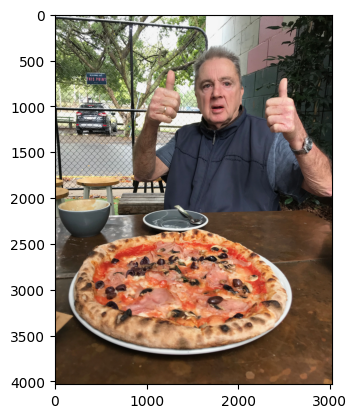

In [110]:
plt.imshow(custom_image_uint8.permute(1,2,0))

In [114]:
##Creating a transform pipeline to resize the image
custom_image_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),

])

In [115]:
##transform the target image
custom_image_transformed = custom_image_transform(custom_image)

In [117]:
custom_image_transformed.shape

torch.Size([3, 64, 64])

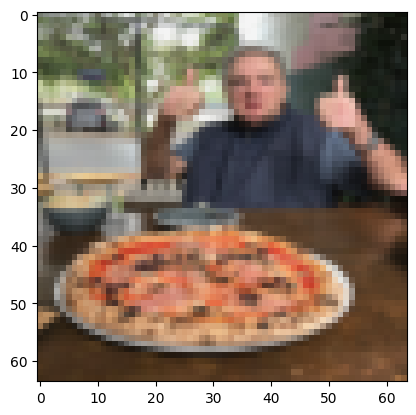

In [118]:
plt.imshow(custom_image_transformed.permute(1,2,0))

In [125]:
##As we can see this is very pixalated, one way we can actually change this is by increasing the actual size of our image data and the CNN processing so it can consider the non pixalated version for more accuracy
##we will also have to add a batch size to this too
model_1.eval()
with torch.inference_mode():

  custom_image_pred = model_1(custom_image_transformed.unsqueeze(0).to(device))

custom_image_pred


torch.Size([1, 10, 30, 30])
torch.Size([1, 10, 13, 13])
torch.Size([1, 3])


tensor([[ 0.0545, -0.2720, -0.5444]], device='cuda:0')

In [134]:
custom_image_pred_probs = torch.softmax(custom_image_pred, dim=1)

##Logits are basically these, the custom probability of each of our classes
custom_image_pred_probs

tensor([[0.4404, 0.3177, 0.2419]], device='cuda:0')

In [136]:
##how can we get the index with the highest value
##converting prediciton probabolities -> predicition labels
custom_image_pred_labels = torch.argmax(custom_image_pred_probs, dim=1)
custom_image_pred_labels

tensor([0], device='cuda:0')

In [135]:
class_names

['pizza', 'steak', 'sushi']

In [130]:
def inference_model_check(model: torch.nn.Module, custom_image_transformed: torch.Tensor, class_names: list):
  model.eval()
  class_name_index = 0
  with torch.inference_mode():
    custom_image_prediction = model(custom_image_transformed.unsqueeze(0).to(device))
  custom_image_prediction.cpu().numpy()

  for pred in range(len(custom_image_prediction)-1):
    if custom_image_prediction[pred] > custom_image_prediction[pred+1]:
      class_name_index = pred+1
    else:
      class_name_index=pred
  return class_names[class_name_index]






In [131]:
ans = inference_model_check(model_1, custom_image_transformed, class_names)
print(ans)

torch.Size([1, 10, 30, 30])
torch.Size([1, 10, 13, 13])
torch.Size([1, 3])
pizza


In [ ]:
## as you can see for this example we get pizza returned back which shows the model is successfully working
